In [1]:
import re
p = re.compile('ca*t')
print(p.match('caaaaaaaat'))


<re.Match object; span=(0, 10), match='caaaaaaaat'>


In [2]:
import re
# . ^ $ * + ? {} [] | \d \D \s ()
# + 表示前面这个字符出现1-n次
# ? 表示前面这个字符出现0次或一次 (有更多的作用)
# \d 表示匹配的内容是一个数字  [0-9]+ 和 \d 的功能是一模一样的
# \D 匹配不包含数字的
# [] 表示任意一个字符匹配成功, 都可以匹配成功
# () 分组   2020-03-01  (2020)-(03)-(01).group()  使用正则分组来提取
# (03|04) 只提取03或者04 如果是. 05等等都会被提取
# ^$ 表示这一行是空行
# .*? 不使用贪婪模式 abcccccd abc*(贪婪模式)
# \s 空白符

p = re.compile('abc*')  # *号匹配的时候, 会尽可能长去匹配
print(p.match('abccccccd'))

p = re.compile('abc*?')
print(p.match('abcccccd'))
print(p.match('abd'))

# <img /img>

<re.Match object; span=(0, 8), match='abcccccc'>
<re.Match object; span=(0, 2), match='ab'>
<re.Match object; span=(0, 2), match='ab'>


In [24]:
import re
p =re.compile('jpg$')
print(p.search('abc.jpg'))

<re.Match object; span=(4, 7), match='jpg'>


In [25]:
# .*? 不使用贪婪模式 abcccccd abc*(贪婪模式)
import re
# 贪婪模式
p = re.compile('<.*>')
s = '<html><head><title>Title</title>'
print(len(s))
print(p.match(s).span())   # .span() 方法  (范围的意思)


32
(0, 32)


In [26]:
# from pandas import Serise,DateFrame
import pandas as pd

obj = pd.Series([4, 5, 6, -7])

print(obj)  # 自动添加索引
print(obj.index)
print(obj.values)

0    4
1    5
2    6
3   -7
dtype: int64
RangeIndex(start=0, stop=4, step=1)
[ 4  5  6 -7]


In [27]:
import pandas as pd 

obj = pd.Series([2,4,5,9,-10],index = ['a','b','c','d','z'])
print(obj)
obj['c'] = 6
print(obj)

print('a' in obj)  # 判断 'a' 是否在索引中

a     2
b     4
c     5
d     9
z   -10
dtype: int64
a     2
b     4
c     6
d     9
z   -10
dtype: int64
True


In [28]:
import pandas as pd 
# 将 字典转化为 Series

sdata = {'beijing':123, 'shanghai':342,'zhejiang':111}

obj2 = pd.Series(sdata)
print(obj2)

obj2.index = ["a","b","c"]  # 更改索引
print(obj2)

beijing     123
shanghai    342
zhejiang    111
dtype: int64
a    123
b    342
c    111
dtype: int64


In [29]:
import pandas as pd  # 多维表格

data = {"city": ['shanghai', 'zhejiang', 'jiaxing', 'sichuan', 'wuhan'],
        'year': [1, 2, 3, 4, 5],
        'pop': [23, 321312, 312312, 312312, 43]}

frame = pd.DataFrame(data)

print(frame)

frame2 = pd.DataFrame(data, columns=['year', 'city', 'pop'])  # 按这个顺序排序

print(frame2)

print('-'*20)
print(frame2['city'])
print('-'*20)
print(frame2.city)

frame2['new']= [123,3213,4324,534,111]
print(frame2)


       city  year     pop
0  shanghai     1      23
1  zhejiang     2  321312
2   jiaxing     3  312312
3   sichuan     4  312312
4     wuhan     5      43
   year      city     pop
0     1  shanghai      23
1     2  zhejiang  321312
2     3   jiaxing  312312
3     4   sichuan  312312
4     5     wuhan      43
--------------------
0    shanghai
1    zhejiang
2     jiaxing
3     sichuan
4       wuhan
Name: city, dtype: object
--------------------
0    shanghai
1    zhejiang
2     jiaxing
3     sichuan
4       wuhan
Name: city, dtype: object
   year      city     pop   new
0     1  shanghai      23   123
1     2  zhejiang  321312  3213
2     3   jiaxing  312312  4324
3     4   sichuan  312312   534
4     5     wuhan      43   111


In [30]:
import pandas as pd  # 多维表格

data = {"city": ['shanghai', 'zhejiang', 'jiaxing', 'sichuan', 'wuhan'],
        'year': [1, 2, 3, 4, 5],
        'pop': [23, 321312, 312312, 312312, 43]}

frame = pd.DataFrame(data)

frame['cap'] = frame.city =='zhejiang'
print(frame) 

       city  year     pop    cap
0  shanghai     1      23  False
1  zhejiang     2  321312   True
2   jiaxing     3  312312  False
3   sichuan     4  312312  False
4     wuhan     5      43  False


In [3]:
import pandas as pd  # 多维表格

pop = {'beijing':{2008:1.5,2009:2.1},
        'shanghai':{2008:1.1,2009:9.9}
       }

frame = pd.DataFrame(pop)
print(frame)

# 行列式的转置
print(frame.T)

      beijing  shanghai
2008      1.5       1.1
2009      2.1       9.9
          2008  2009
beijing    1.5   2.1
shanghai   1.1   9.9


In [32]:
import pandas as pd  # 多维表格

pop = {'beijing':{2008:1.5,2009:2.1},
        'shanghai':{2008:1.1,2009:9.9}
       }

frame = pd.DataFrame(pop)

obj1 = pd.Series([3.2,2.2,1.1,5.9],index = ['b','c','a','d'])
print(obj1)
obj2 = obj1.reindex(['a','b','c','d','e'],fill_value=0)
print('-'*20)
print(obj2)

print('-'*20)

obj3 = pd.Series(['blue','purple','yellow'],index = [0,2,4])
print(obj3.reindex(range(6),method='ffill')) # 使用上面的值进行填充
print('-'*20)
print(obj3.reindex(range(6),method='bfill')) # 使用下面的值填充



b    3.2
c    2.2
a    1.1
d    5.9
dtype: float64
--------------------
a    1.1
b    3.2
c    2.2
d    5.9
e    0.0
dtype: float64
--------------------
0      blue
1      blue
2    purple
3    purple
4    yellow
5    yellow
dtype: object
--------------------
0      blue
1    purple
2    purple
3    yellow
4    yellow
5       NaN
dtype: object


In [33]:
from numpy import nan as NA # 删除缺失值
from pandas import Series
data = Series([1,NA,2])
print(data.dropna())

0    1.0
2    2.0
dtype: float64


In [34]:
from numpy import nan as NA # 删除缺失值
from pandas import Series
from pandas import DataFrame

data = DataFrame([[1,2,3],[1,NA,NA],[NA,NA,NA]])
print(data)

     0    1    2
0  1.0  2.0  3.0
1  1.0  NaN  NaN
2  NaN  NaN  NaN


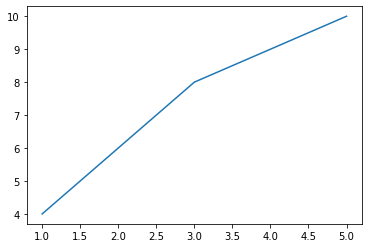

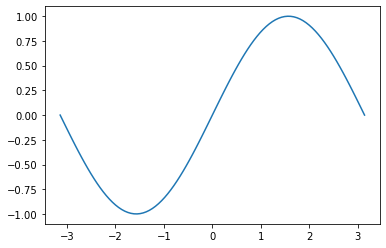

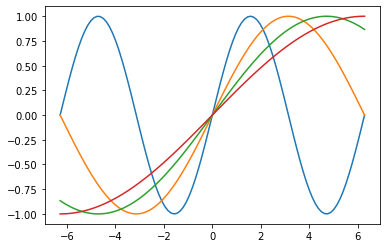

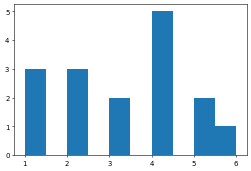

AttributeError: module 'numpy' has no attribute 'arrange'

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') # 忽略警告

# 使用pyplot这个模块

plt.plot([1, 3, 5], [4, 8, 10])
plt.show()

x = np.linspace(-np.pi, np.pi, 100)  # x的定义域为 -3.14-3.14 中间间隔100个元素
plt.plot(x, np.sin(x))

plt.show()

# 绘制多条曲线
x = np.linspace(-np.pi*2, np.pi*2, 100)
for i in range(1, 5):
    plt.plot(x, np.sin(x/i))
plt.show()

plt.figure(1, dpi=50)  # 创建图表1, dpi代表图片精细度 dpi越大, 文件越大, 杂志要300以上

data = [1, 1, 1, 2, 2, 2, 3, 3, 4, 5, 5, 6, 4, 4, 4, 4]  # 根据数字的数量来创建直方图
plt.hist(data)
plt.show()


x = np.arrange(1, 10)
y = x
fig = plt.figure()
# c='r' 表示散点的颜色为红色, marker表示指定散点形状为圆形
plt.scatter(x, y, c='yellow', marker='o')
plt.show()

iris = pd.read_csv("iris_training.csv")
print(iris.head())

# 绘制散点图
iris.plot(kind="scatter",x="120",y="4")

plt.show()

iris = pd.read_csv("./iris_training.csv")
# 设置样式
sns.set(style='white',color_codes=True)
# 设置绘制格式为散点图
sns.jointplot(x='120',y='4',data=iris,size = 5)

# distplot绘制曲线
sns.distplot(iris['120'])

plt.show()